In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian, laplace, prewitt, scharr, difference_of_gaussians
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
from skimage import data, io
import scipy.ndimage as ndi 

import cv2

In [9]:
I = cv2.imread('im19.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

(-0.5, 357.5, 536.5, -0.5)

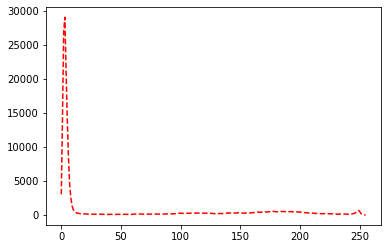

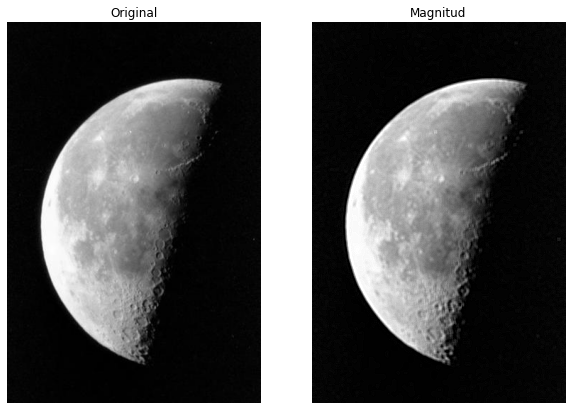

In [10]:
Ig = cv2.GaussianBlur(I,(5,5),cv2.BORDER_DEFAULT)
laplacian = cv2.Laplacian(Ig,cv2.CV_64F)
If= Ig-3*laplacian
Is=cv2.convertScaleAbs(If,alpha=1,beta=0)

hist,bins = np.histogram(I.ravel(),256,[0,256])
plt.plot(bins[:-1],hist,'r--')

# cv2.imshow('image',Is)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(If, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Magnitud')
ax[1].axis("off")




Text(0.5, 1.0, 'laplace 1 means')

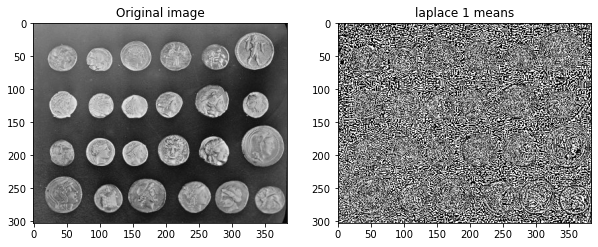

In [4]:
kernel = np.array([[0, 1, 0], [1,-4, 1], [0,1, 0]])
If=ndi.correlate(I,kernel, mode='reflect')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(If, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('laplace 1 means')

Text(0.5, 1.0, 'Sharpen filter')

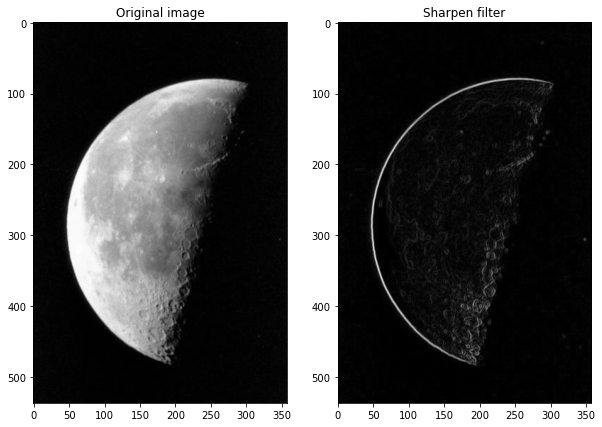

In [4]:
If2=laplace(I)
If2=prewitt(I,axis=None)
If2=scharr(I)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(If2, cmap='gray')
ax[1].set_title('Sharpen filter')

Text(0.5, 1.0, 'NLM and Laplace 2')

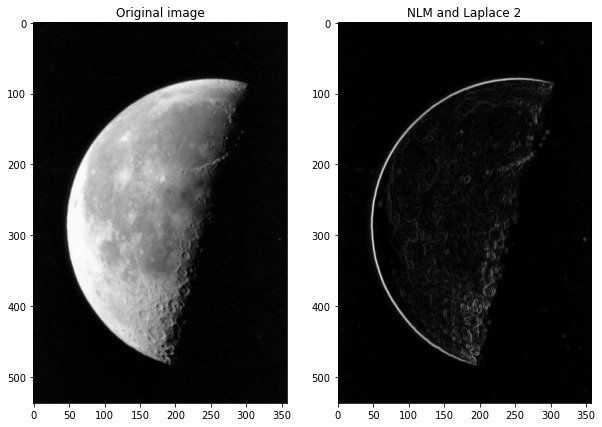

In [5]:
I=I.astype(float)
sigma_est=np.mean(estimate_sigma(I))
In=denoise_nl_means(I,h=5*sigma_est,fast_mode=False,patch_size=5,patch_distance=6)
If3=laplace(In)
If3=prewitt(In,axis=None)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(If3, cmap='gray')
ax[1].set_title('NLM and Laplace 2')

Text(0.5, 1.0, 'LoG 2 filter')

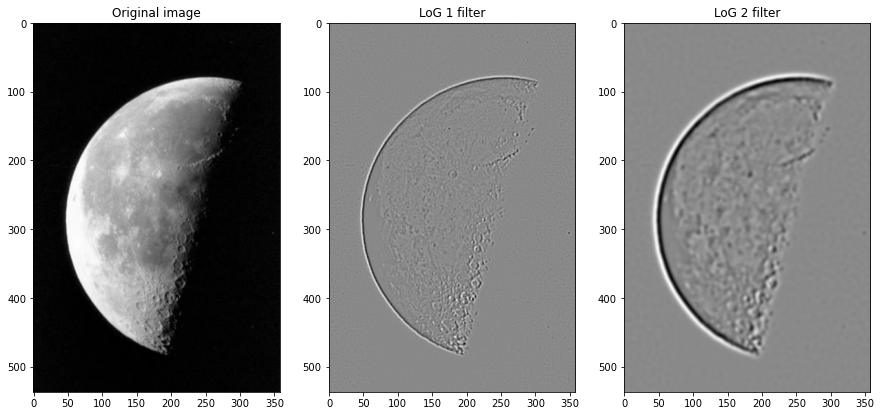

In [24]:
I=I.astype(float)
I4 = ndi.gaussian_laplace(I, sigma=1)
I5 = ndi.gaussian_laplace(I, sigma=3)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(I4, cmap='gray')
ax[1].set_title('LoG 1 filter')

ax[2].imshow(I5, cmap='gray')
ax[2].set_title('LoG 2 filter')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
print(((-1-np.sqrt(5))/2))
print(((-1+np.sqrt(5))/2))

-1.618033988749895
0.6180339887498949


In [14]:
print(0.6180339887498949-1)


-0.3819660112501051
